# Explore Exercises

### Initial Setup

In [1]:
# data manipulation 
import numpy as np
import pandas as pd

from datetime import datetime
import itertools

# data visualization 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import matplotlib.dates as mdates

%matplotlib inline

from sklearn.model_selection import TimeSeriesSplit

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# web-based requests
import requests

# Importing the os library specifically for reading the csv once I've created the file in my working directory.
import os

import acquire
import prepare
from time import strftime

credentials loaded successfully
End of file.


Read df from .csv
Reformatted dates correctly
Set dates as index


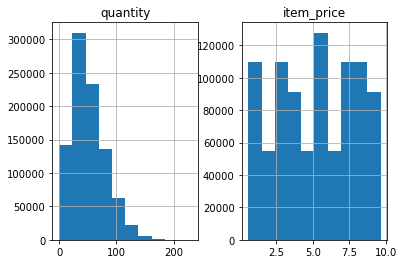

,item,quantity,sale_id,store,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month,day,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,Tuesday,10.92
2013-01-01 00:00:00+00:00,12,26.0,211817,7,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,12018 Perrin Beitel Rd,San Antonio,TX,78217,1,Tuesday,218.40
2013-01-01 00:00:00+00:00,46,27.0,832657,7,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,12018 Perrin Beitel Rd,San Antonio,TX,78217,1,Tuesday,125.55
2013-01-01 00:00:00+00:00,12,54.0,213643,8,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,15000 San Pedro Ave,San Antonio,TX,78232,1,Tuesday,453.60
2013-01-01 00:00:00+00:00,12,35.0,215469,9,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,735 SW Military Dr,San Antonio,TX,78221,1,Tuesday,294.00


In [2]:
# Prepping the dataframe:

df = prepare.prep_store_data()
df.head()

#### Checking the shape, info and dtype for my columns.

In [3]:
df.shape

(913000, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 00:00:00+00:00 to 2017-12-31 00:00:00+00:00
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item           913000 non-null  int64  
 1   quantity       913000 non-null  float64
 2   sale_id        913000 non-null  int64  
 3   store          913000 non-null  int64  
 4   item_brand     913000 non-null  object 
 5   item_name      913000 non-null  object 
 6   item_price     913000 non-null  float64
 7   item_upc12     913000 non-null  int64  
 8   item_upc14     913000 non-null  int64  
 9   store_address  913000 non-null  object 
 10  store_city     913000 non-null  object 
 11  store_state    913000 non-null  object 
 12  store_zipcode  913000 non-null  int64  
 13  month          913000 non-null  int64  
 14  day            913000 non-null  object 
 15  sales_total    913000 non-null  float64
dtypes: float64(3), int64(7), obj

In [5]:
df.index.dtype

datetime64[ns, GMT]

In [6]:
# Adding year column. Need to add this to prep.
df.resample("D").sum()
df['year'] = df.index.year

In [7]:
# df.rename(columns = {'sales_total': 'revenue'}, inplace = True)
df.head()

,item,quantity,sale_id,store,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month,day,sales_total,year
sale_date,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,Tuesday,10.92,2013
2013-01-01 00:00:00+00:00,12,26.0,211817,7,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,12018 Perrin Beitel Rd,San Antonio,TX,78217,1,Tuesday,218.40,2013
2013-01-01 00:00:00+00:00,46,27.0,832657,7,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,12018 Perrin Beitel Rd,San Antonio,TX,78217,1,Tuesday,125.55,2013
2013-01-01 00:00:00+00:00,12,54.0,213643,8,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,15000 San Pedro Ave,San Antonio,TX,78232,1,Tuesday,453.60,2013
2013-01-01 00:00:00+00:00,12,35.0,215469,9,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,735 SW Military Dr,San Antonio,TX,78221,1,Tuesday,294.00,2013


In [8]:
df.shape

(913000, 17)

# Exercises

For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.

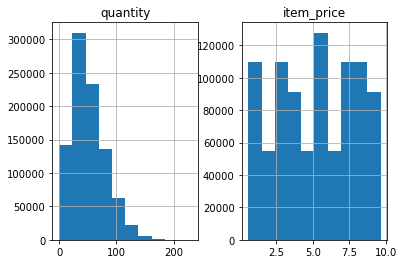

In [9]:
df[['quantity', 'item_price']].hist()
plt.show()

#### 1. Split your data into train and test using the sklearn.model_selection.TimeSeriesSplit method.

In [20]:
revenue_df = df[['sales_total']]
revenue_df.head()

,sales_total
sale_date,
2013-01-01 00:00:00+00:00,10.92
2013-01-01 00:00:00+00:00,218.40
2013-01-01 00:00:00+00:00,125.55
2013-01-01 00:00:00+00:00,453.60
2013-01-01 00:00:00+00:00,294.00


In [21]:
revenue_df = revenue_df.resample("D").sum()
revenue_df.head()

,sales_total
sale_date,
2013-01-01 00:00:00+00:00,73844.01
2013-01-02 00:00:00+00:00,73570.58
2013-01-03 00:00:00+00:00,78169.48
2013-01-04 00:00:00+00:00,84467.73
2013-01-05 00:00:00+00:00,87621.85


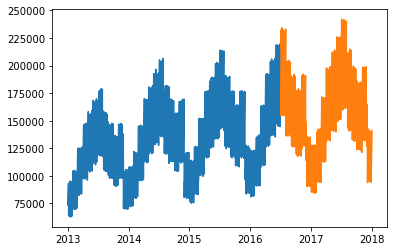

In [22]:
train_size = .70
n = revenue_df.shape[0]
test_start_index = round(train_size * n)

train = revenue_df[:test_start_index] # everything up (not including) to the test_start_index
test = revenue_df[test_start_index:] # everything from the test_start_index to the end

plt.plot(train.index, train.sales_total)
plt.plot(test.index, test.sales_total

In [23]:
train.shape, test.shape

((1278, 1), (548, 1))

In [25]:
train.shape[0] + test.shape[0] == df.resample("D").sales_total.sum().shape[0]

True

#### 2. Validate your splits by plotting X_train and y_train.

In [26]:
# y is sales_total I believe, since that's what we are trying to predict.

y = train.sales_total
y.head()

sale_date
2013-01-01 00:00:00+00:00    73844.01
2013-01-02 00:00:00+00:00    73570.58
2013-01-03 00:00:00+00:00    78169.48
2013-01-04 00:00:00+00:00    84467.73
2013-01-05 00:00:00+00:00    87621.85
Freq: D, Name: sales_total, dtype: float64

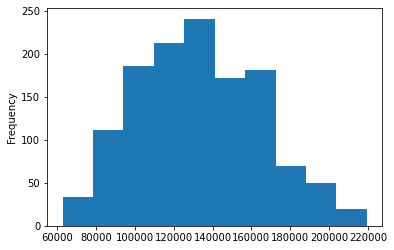

In [27]:
y.plot.hist()
plt.show()

In [28]:
train.head()

,sales_total
sale_date,
2013-01-01 00:00:00+00:00,73844.01
2013-01-02 00:00:00+00:00,73570.58
2013-01-03 00:00:00+00:00,78169.48
2013-01-04 00:00:00+00:00,84467.73
2013-01-05 00:00:00+00:00,87621.85


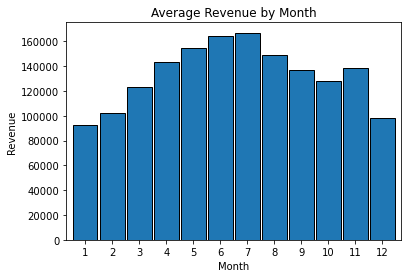

In [34]:
ax = y.groupby(y.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Revenue by Month', xlabel='Month', ylabel='Revenue')
plt.show()

<AxesSubplot:ylabel='sales_total'>

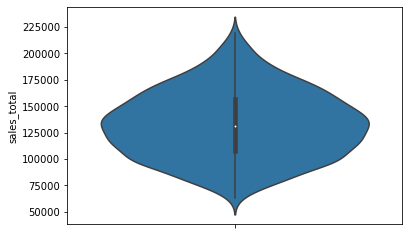

In [35]:
sns.violinplot(x = 'year', y = 'sales_total', data = train)

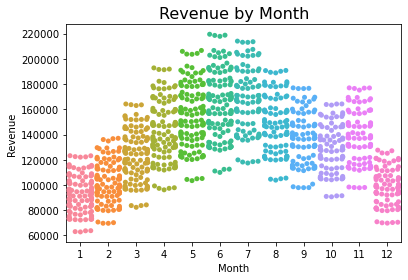

In [46]:
# plotting the chart:
swarmgraph = sns.swarmplot(x = y.index.month, y = 'sales_total', data = train)

# Labels and colors:
swarmgraph.set_title(label = "Revenue by Month", fontsize = 16)
swarmgraph.set_xlabel('Month')
swarmgraph.set_ylabel('Revenue')

#printing the completed chart (removes any extraneous):
plt.show()

#### 3. Plot the weekly average & the 7-day moving average. Compare the 2 plots.

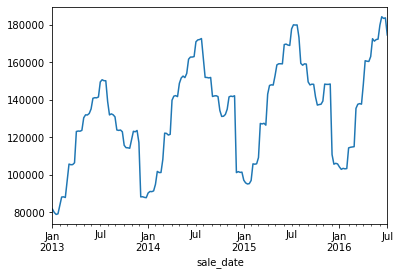

In [47]:
# Weekly average using resampling.

y.resample("W").mean().plot()
plt.show()

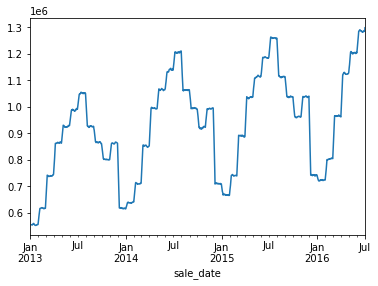

In [48]:
# 7 day moving average:

y.rolling(7).sum().plot()
plt.show()

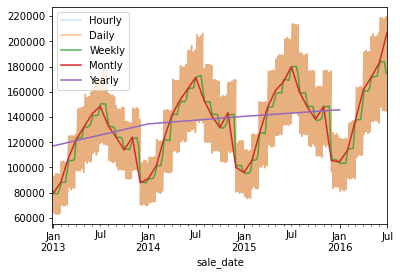

In [49]:
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()